## Data Cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ecommerce_data.csv', sep=';', quotechar='"', encoding='utf-8')

In [3]:
df.head()

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,"16284,02",1,"16284,02","1,39",1684,11.11.2024
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,"6645,2",2,"13290,4","2,56",3604,22.06.2024
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,"8882,92",3,"26648,76","4,98",1257,27.05.2024
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,"3665,44",1,"3665,44","1,44",662,25.07.2024
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,"5210,37",2,"10420,74","3,73",2424,19.02.2024


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      10000 non-null  object
 1   Product      10000 non-null  object
 2   Category     10000 non-null  object
 3   Brand        10000 non-null  object
 4   Platform     10000 non-null  object
 5   City         10000 non-null  object
 6   Price        10000 non-null  object
 7   Quantity     10000 non-null  int64 
 8   TotalAmount  10000 non-null  object
 9   Rating       10000 non-null  object
 10  Reviews      10000 non-null  int64 
 11  OrderDate    10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 546.9+ KB


In [6]:
from datetime import datetime

def parse_dates(x):
    for fmt in ("%d.%m.%Y", "%m/%d/%Y"):
        try:
            return datetime.strptime(x, fmt)
        except:
            continue
    return pd.NaT

df['OrderDate'] = df['OrderDate'].apply(parse_dates)

In [7]:
df['Price'] = df['Price'].str.replace(',', '.', regex=False)
df['TotalAmount'] = df['TotalAmount'].str.replace(',', '.', regex=False)
df['Rating'] = df['Rating'].str.replace(',', '.', regex=False)

In [8]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [9]:
df.dtypes

OrderID                object
Product                object
Category               object
Brand                  object
Platform               object
City                   object
Price                 float64
Quantity                int64
TotalAmount           float64
Rating                float64
Reviews                 int64
OrderDate      datetime64[ns]
dtype: object

In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)

In [11]:
df.columns

Index(['orderid', 'product', 'category', 'brand', 'platform', 'city', 'price',
       'quantity', 'totalamount', 'rating', 'reviews', 'orderdate'],
      dtype='object')

In [12]:
df[df.duplicated()]

,orderid,product,category,brand,platform,city,price,quantity,totalamount,rating,reviews,orderdate


In [13]:
df.isna().sum()

orderid        0
product        0
category       0
brand          0
platform       0
city           0
price          0
quantity       0
totalamount    0
rating         0
reviews        0
orderdate      0
dtype: int64

In [14]:
df_backup = df.copy()

In [15]:
df[df['price'] < 0]

,orderid,product,category,brand,platform,city,price,quantity,totalamount,rating,reviews,orderdate


In [16]:
df[df['quantity'] < 0]

,orderid,product,category,brand,platform,city,price,quantity,totalamount,rating,reviews,orderdate


In [17]:
df['expected_totalamount'] = df['price'] * df['quantity']

In [18]:
df['is_correct'] = (
    (df['totalamount'] - df['expected_totalamount']).abs() < 0.01
)

In [19]:
df['is_correct'].value_counts()

is_correct
True    10000
Name: count, dtype: int64

In [20]:
df.head()

,orderid,product,category,brand,platform,city,price,quantity,totalamount,rating,reviews,orderdate,expected_totalamount,is_correct
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,16284.02,True
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,13290.40,True
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,26648.76,True
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,3665.44,True
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,10420.74,True


In [21]:
df.drop(
    ['is_correct', 'expected_totalamount'],
    axis=1,
    inplace=True
)

In [22]:
df.head()

,orderid,product,category,brand,platform,city,price,quantity,totalamount,rating,reviews,orderdate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19


In [23]:
df['order_month'] = df['orderdate'].dt.month_name()

In [24]:
df

,orderid,product,category,brand,platform,city,price,quantity,totalamount,rating,reviews,orderdate,order_month
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,November
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,June
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,May
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,July
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21,May
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27,November
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15,October
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26,April


In [25]:
df.to_csv('ecommerce_clean.csv', index=False)

In [26]:
df.columns

Index(['orderid', 'product', 'category', 'brand', 'platform', 'city', 'price',
       'quantity', 'totalamount', 'rating', 'reviews', 'orderdate',
       'order_month'],
      dtype='object')

## Data_Aggregation

In [27]:
total_revenue = df['totalamount'].sum()
orders_count = df['orderid'].nunique()
units_sold = df['quantity'].sum()
average_order_value = total_revenue / orders_count

executive_summary = {
    "total_revenue": round(total_revenue, 2),
    "orders_count": orders_count,
    "units_sold": int(units_sold),
    "average_order_value": round(average_order_value, 2)
}

executive_summary

{'total_revenue': np.float64(301995724.39),
 'orders_count': 10000,
 'units_sold': 30062,
 'average_order_value': np.float64(30199.57)}

In [28]:
monthly_sales = (
    df.groupby('order_month')
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique'),
          units_sold=('quantity', 'sum')
      )
      .reset_index()
      .sort_values('order_month')
)

monthly_sales

,order_month,revenue,orders,units_sold
0,April,24950410.65,832,2546
1,August,25264031.98,841,2507
2,December,21946736.69,726,2196
3,February,23199060.32,775,2393
4,January,26425904.77,878,2612
5,July,26801658.28,855,2564
6,June,23649020.33,788,2353
7,March,25599416.15,894,2588
8,May,26286508.96,871,2630
9,November,25660914.18,827,2508


In [29]:
category_performance = (
    df.groupby('category')
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique'),
          units_sold=('quantity', 'sum')
      )
      .reset_index()
)

category_performance['avg_order_value'] = (
    category_performance['revenue'] / category_performance['orders']
)

total_revenue = df['totalamount'].sum()
category_performance['revenue_share_pct'] = (
    category_performance['revenue'] / total_revenue * 100
)

category_performance = (
    category_performance
    .round({
        'revenue': 2,
        'avg_order_value': 2,
        'revenue_share_pct': 2
    })
    .sort_values('revenue', ascending=False)
)

category_performance

,category,revenue,orders,units_sold,avg_order_value,revenue_share_pct
2,Electronics,92327183.77,3028,9036,30491.14,30.57
3,Fashion,91504159.73,2970,8980,30809.48,30.30
1,Computers,57542997.56,1953,5892,29463.90,19.05
4,Wearables,31420413.20,1020,3111,30804.33,10.40
0,Accessories,29200970.13,1029,3043,28378.01,9.67


In [30]:
product_performance = (
    df.groupby(['category', 'product'])
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique'),
          units_sold=('quantity', 'sum'),
          avg_price=('price', 'mean')
      )
      .reset_index()
)

total_revenue = df['totalamount'].sum()
product_performance['revenue_share_pct'] = (
    product_performance['revenue'] / total_revenue * 100
)

product_performance = product_performance.round({
    'revenue': 2,
    'avg_price': 2,
    'revenue_share_pct': 2
})

product_performance = product_performance.sort_values('revenue', ascending=False)

product_performance.head(10)


,category,product,revenue,orders,units_sold,avg_price,revenue_share_pct
4,Electronics,Xiaomi Redmi Note 12,33772598.37,1030,3187,10421.68,11.18
9,Wearables,Smartwatch FitPro,31420413.20,1020,3111,10064.10,10.40
7,Fashion,Nike Air Max,30727637.51,1005,3040,10107.31,10.17
8,Fashion,T-shirt Cotton,30507500.40,997,3036,10029.69,10.10
6,Fashion,Adidas Running Shoes,30269021.82,968,2904,10349.65,10.02
3,Electronics,Samsung Galaxy A14,30004263.23,1043,3056,9885.62,9.94
2,Computers,HP Pavilion Laptop,29482727.14,991,2979,10012.15,9.76
0,Accessories,Bluetooth Headset,29200970.13,1029,3043,9709.87,9.67
5,Electronics,iPhone 13,28550322.17,955,2793,10113.94,9.45
1,Computers,Dell Inspiron 3501,28060270.42,962,2913,9585.49,9.29


In [31]:
top_products_by_category = (
    product_performance
    .sort_values(['category', 'revenue'], ascending=[True, False])
    .groupby('category')
    .head(5)
)

top_products_by_category

,category,product,revenue,orders,units_sold,avg_price,revenue_share_pct
0,Accessories,Bluetooth Headset,29200970.13,1029,3043,9709.87,9.67
2,Computers,HP Pavilion Laptop,29482727.14,991,2979,10012.15,9.76
1,Computers,Dell Inspiron 3501,28060270.42,962,2913,9585.49,9.29
4,Electronics,Xiaomi Redmi Note 12,33772598.37,1030,3187,10421.68,11.18
3,Electronics,Samsung Galaxy A14,30004263.23,1043,3056,9885.62,9.94
5,Electronics,iPhone 13,28550322.17,955,2793,10113.94,9.45
7,Fashion,Nike Air Max,30727637.51,1005,3040,10107.31,10.17
8,Fashion,T-shirt Cotton,30507500.40,997,3036,10029.69,10.10
6,Fashion,Adidas Running Shoes,30269021.82,968,2904,10349.65,10.02
9,Wearables,Smartwatch FitPro,31420413.20,1020,3111,10064.10,10.40


In [32]:
brand_performance = (
    df.groupby('brand')
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique'),
          units_sold=('quantity', 'sum'),
          avg_rating=('rating', 'mean'),
          total_reviews=('reviews', 'sum')
      )
      .reset_index()
)

brand_performance['avg_order_value'] = (
    brand_performance['revenue'] / brand_performance['orders']
)

brand_performance = brand_performance.round({
    'revenue': 2,
    'avg_order_value': 2,
    'avg_rating': 2
})

brand_performance = brand_performance.sort_values('revenue', ascending=False)

brand_performance

,brand,revenue,orders,units_sold,avg_rating,total_reviews,avg_order_value
9,Xiaomi,33772598.37,1030,3187,2.99,2609353,32788.93
3,FitPro,31420413.20,1020,3111,3.03,2518191,30804.33
7,Nike,30727637.51,1005,3040,2.96,2505699,30574.76
4,Generic,30507500.40,997,3036,2.95,2534748,30599.30
0,Adidas,30269021.82,968,2904,2.97,2464191,31269.65
8,Samsung,30004263.23,1043,3056,3.05,2604628,28767.27
5,HP,29482727.14,991,2979,3.07,2526089,29750.48
6,JBL,29200970.13,1029,3043,3.00,2632079,28378.01
1,Apple,28550322.17,955,2793,3.06,2350559,29895.63
2,Dell,28060270.42,962,2913,2.99,2455185,29168.68


In [33]:
risk_brands = brand_performance[
    (brand_performance['revenue'] > brand_performance['revenue'].median()) &
    (brand_performance['avg_rating'] < 3.5)
]

risk_brands

,brand,revenue,orders,units_sold,avg_rating,total_reviews,avg_order_value
9,Xiaomi,33772598.37,1030,3187,2.99,2609353,32788.93
3,FitPro,31420413.20,1020,3111,3.03,2518191,30804.33
7,Nike,30727637.51,1005,3040,2.96,2505699,30574.76
4,Generic,30507500.40,997,3036,2.95,2534748,30599.30
0,Adidas,30269021.82,968,2904,2.97,2464191,31269.65


In [34]:
growth_brands = brand_performance[
    (brand_performance['avg_rating'] >= 4.5) &
    (brand_performance['revenue'] < brand_performance['revenue'].median())
]

growth_brands

,brand,revenue,orders,units_sold,avg_rating,total_reviews,avg_order_value


In [35]:
platform_performance = (
    df.groupby('platform')
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique'),
          units_sold=('quantity', 'sum')
      )
      .reset_index()
)

platform_performance['avg_order_value'] = (
    platform_performance['revenue'] / platform_performance['orders']
)

total_revenue = df['totalamount'].sum()
platform_performance['revenue_share_pct'] = (
    platform_performance['revenue'] / total_revenue * 100
)


platform_performance = platform_performance.round({
    'revenue': 2,
    'avg_order_value': 2,
    'revenue_share_pct': 2
})


platform_performance = platform_performance.sort_values('revenue', ascending=False)

platform_performance

,platform,revenue,orders,units_sold,avg_order_value,revenue_share_pct
2,Souq,1.019210e+08,3371,10101,30234.64,33.75
1,Jumia,1.016971e+08,3341,10105,30439.11,33.68
0,Amazon,9.837767e+07,3288,9856,29920.22,32.58


In [36]:
platform_performance[['platform', 'orders', 'avg_order_value']]

,platform,orders,avg_order_value
2,Souq,3371,30234.64
1,Jumia,3341,30439.11
0,Amazon,3288,29920.22


In [37]:
city_performance = (
    df.groupby('city')
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique'),
          units_sold=('quantity', 'sum')
      )
      .reset_index()
)

city_performance['avg_order_value'] = (
    city_performance['revenue'] / city_performance['orders']
)

total_revenue = df['totalamount'].sum()
city_performance['revenue_share_pct'] = (
    city_performance['revenue'] / total_revenue * 100
)

city_performance = city_performance.round({
    'revenue': 2,
    'avg_order_value': 2,
    'revenue_share_pct': 2
})

city_performance = city_performance.sort_values('revenue', ascending=False)

city_performance.head(10)

,city,revenue,orders,units_sold,avg_order_value,revenue_share_pct
1,Cairo,52522076.73,1705,5159,30804.74,17.39
2,Casablanca,52382993.51,1689,5164,31014.21,17.35
5,Riyadh,50364375.88,1679,5022,29996.65,16.68
3,Dubai,49177483.79,1648,4946,29840.71,16.28
0,Alexandria,48844458.99,1657,4967,29477.65,16.17
4,Giza,48704335.49,1622,4804,30027.33,16.13


In [38]:
low_aov_cities = city_performance[
    (city_performance['orders'] > city_performance['orders'].median()) &
    (city_performance['avg_order_value'] < city_performance['avg_order_value'].median())
]

low_aov_cities

,city,revenue,orders,units_sold,avg_order_value,revenue_share_pct
5,Riyadh,50364375.88,1679,5022,29996.65,16.68


In [39]:
high_aov_low_orders_cities = city_performance[
    (city_performance['avg_order_value'] > city_performance['avg_order_value'].median()) &
    (city_performance['orders'] < city_performance['orders'].median())
]

high_aov_low_orders_cities

,city,revenue,orders,units_sold,avg_order_value,revenue_share_pct
4,Giza,48704335.49,1622,4804,30027.33,16.13


In [40]:
overall_avg_rating = df['rating'].mean()
overall_avg_rating = round(overall_avg_rating, 2)

overall_avg_rating

np.float64(3.01)

In [41]:
category_ratings = (
    df.groupby('category')
      .agg(
          avg_rating=('rating', 'mean'),
          total_reviews=('reviews', 'sum')
      )
      .reset_index()
      .round({'avg_rating': 2})
      .sort_values('avg_rating')
)

category_ratings

,category,avg_rating,total_reviews
3,Fashion,2.96,7504638
0,Accessories,3.00,2632079
1,Computers,3.03,4981274
2,Electronics,3.03,7564540
4,Wearables,3.03,2518191


In [42]:
product_ratings = (
    df.groupby(['category', 'product'])
      .agg(
          avg_rating=('rating', 'mean'),
          total_reviews=('reviews', 'sum'),
          revenue=('totalamount', 'sum')
      )
      .reset_index()
      .round({
          'avg_rating': 2,
          'revenue': 2
      })
)
product_ratings

,category,product,avg_rating,total_reviews,revenue
0,Accessories,Bluetooth Headset,3.00,2632079,29200970.13
1,Computers,Dell Inspiron 3501,2.99,2455185,28060270.42
2,Computers,HP Pavilion Laptop,3.07,2526089,29482727.14
3,Electronics,Samsung Galaxy A14,3.05,2604628,30004263.23
4,Electronics,Xiaomi Redmi Note 12,2.99,2609353,33772598.37
5,Electronics,iPhone 13,3.06,2350559,28550322.17
6,Fashion,Adidas Running Shoes,2.97,2464191,30269021.82
7,Fashion,Nike Air Max,2.96,2505699,30727637.51
8,Fashion,T-shirt Cotton,2.95,2534748,30507500.40
9,Wearables,Smartwatch FitPro,3.03,2518191,31420413.20


In [43]:
risk_products = product_ratings[
    (product_ratings['revenue'] > product_ratings['revenue'].median()) &
    (product_ratings['avg_rating'] < 3.5)
].sort_values('revenue', ascending=False)

risk_products

,category,product,avg_rating,total_reviews,revenue
4,Electronics,Xiaomi Redmi Note 12,2.99,2609353,33772598.37
9,Wearables,Smartwatch FitPro,3.03,2518191,31420413.20
7,Fashion,Nike Air Max,2.96,2505699,30727637.51
8,Fashion,T-shirt Cotton,2.95,2534748,30507500.40
6,Fashion,Adidas Running Shoes,2.97,2464191,30269021.82


In [44]:
growth_products = product_ratings[
    (product_ratings['avg_rating'] >= 4.5) &
    (product_ratings['revenue'] < product_ratings['revenue'].median())
].sort_values('avg_rating', ascending=False)

growth_products

,category,product,avg_rating,total_reviews,revenue


In [45]:
import json
from openai import OpenAI
from dotenv import load_dotenv
import os

<class 'ModuleNotFoundError'>: No module named 'dotenv'

In [ ]:
business_report = {
    "executive_summary": executive_summary,
    "monthly_sales": monthly_sales.to_dict(orient="records"),
    "category_performance": category_performance.to_dict(orient="records"),
    "top_products_by_category": top_products_by_category.to_dict(orient="records"),
    "product_performance": product_performance.to_dict(orient="records"),
    "brand_performance": brand_performance.to_dict(orient="records"),
    "risk_brands": risk_brands.to_dict(orient="records"),
    "growth_brands": growth_brands.to_dict(orient="records"),
    "platform_performance": platform_performance.to_dict(orient="records"),
    "city_performance": city_performance.to_dict(orient="records"),
    "low_aov_cities": low_aov_cities.to_dict(orient="records"),
    "high_aov_low_orders_cities": high_aov_low_orders_cities.to_dict(orient="records"),
    "overall_avg_rating": overall_avg_rating,
    "category_ratings": category_ratings.to_dict(orient="records"),
    "product_ratings": product_ratings.to_dict(orient="records"),
    "risk_products": risk_products.to_dict(orient="records"),
    "growth_products": growth_products.to_dict(orient="records"),
}

business_report_json = json.dumps(business_report, indent=4)

with open("business_report.json", "w") as f:
    f.write(business_report_json)

business_report_json[:1000]  # показати перші 1000 символів для перевірки

In [ ]:
load_dotenv()

In [ ]:
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY")
)

In [ ]:
PRODUCTION_PROMPT_V2 = """
You are a Senior Business Analyst preparing an executive-level business performance report for management using the eCommerce sales dataset provided.

Rules:

Use ONLY the input dataset with the following fields: orderid, product, category, brand, platform, city, price, quantity, totalamount, rating, reviews, orderdate, order_month.

Perform only aggregations, ratios, and consistency checks that can be derived directly from these fields.

Do NOT invent data, assumptions, or external benchmarks.

Ensure financial metrics are consistent (e.g., totalamount = price * quantity, profit ≤ sales if profit is calculated).

Explicitly flag any inconsistencies, missing data, or anomalies as business risks.

Focus on business decision support, not technical or descriptive details.

Required Output Format (Markdown only):

Business Performance Report
Management Summary

Provide a concise executive overview answering:

What is happening with overall sales, revenue, and product performance

Which categories, products, brands, platforms, or cities are underperforming or causing loss

Why this matters financially

What management should prioritize next

Executive Summary

Include only decision-critical metrics:

Total Sales (totalamount)

Total Profit (if calculated or assume 0 if not available)

Overall Profit Margin (%)

Share of loss-making orders (if totalamount < 0 or inconsistencies detected)

Key financial risk or opportunity (e.g., top-risk products, categories, or regions)

Key Business Insights

Provide 4–6 insights. EACH insight must follow this structure:

Insight: What is happening (non-obvious finding derived from sales, quantity, category, brand, platform, city, or ratings)
Why it matters: Financial or operational implication
Business impact: Risk or opportunity for management

Recommendations

Provide 3–5 prioritized, action-oriented recommendations:

Target a specific category, brand, product, platform, or city

Address a quantified issue identified above (e.g., low sales, high loss orders, low ratings)

Indicate expected business effect (directional, not speculative)

Key Metrics

Present a concise executive table or bullet list with:

Total Sales (totalamount)

Total Profit

Profit Margin (%)

Share of loss-making orders (%)

Top 3 risk or opportunity drivers (products, categories, platforms, or cities)

Data Limitations & Risks

Explicitly state:

Missing fields or unavailable dimensions (e.g., if profit data is incomplete)

Data quality issues (incorrect totalamount, duplicates, or outliers)

Areas requiring further validation before key decisions
"""

In [ ]:
prompt = f"""
{PRODUCTION_PROMPT_V2}

INPUT DATA:
{business_report_json}
"""

In [ ]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are an expert business analyst."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.2
)

In [ ]:
business_report_md = response.choices[0].message.content

In [ ]:
with open("business_report.md", "w", encoding="utf-8") as f:
    f.write(business_report_md)

## Charts

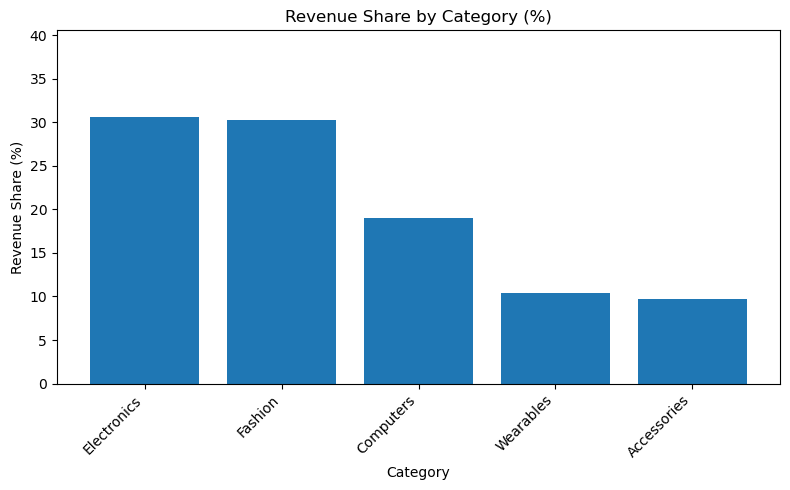

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    category_performance['category'],
    category_performance['revenue_share_pct']
)

plt.title("Revenue Share by Category (%)")
plt.xlabel("Category")
plt.ylabel("Revenue Share (%)")
plt.ylim(0, max(category_performance['revenue_share_pct']) + 10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig(
    "revenue_by_category.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)
plt.show()

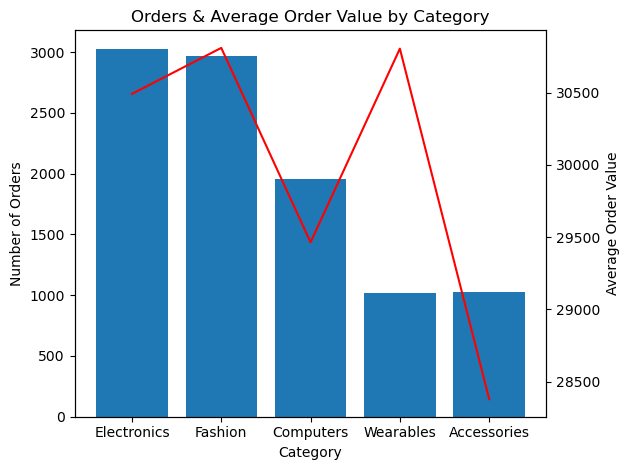

In [57]:
fig, ax1 = plt.subplots()

# Bars: Orders
ax1.bar(
    category_performance['category'],
    category_performance['orders']
)
ax1.set_xlabel("Category")
ax1.set_ylabel("Number of Orders")

# Line: AOV
ax2 = ax1.twinx()
ax2.plot(
    category_performance['category'],
    category_performance['avg_order_value'],
    color='red' 
)
ax2.set_ylabel("Average Order Value")

plt.title("Orders & Average Order Value by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(
    "Order Value by Category.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)
plt.show()


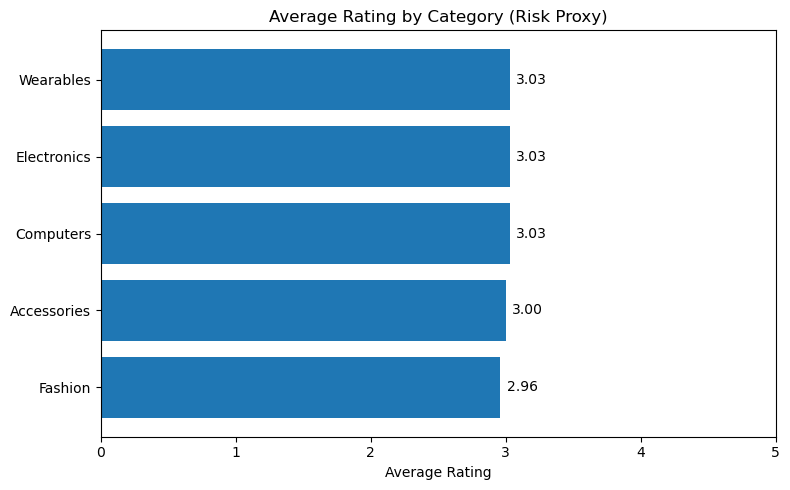

In [74]:
plt.figure(figsize=(8,5))
bars = plt.barh(
    category_ratings['category'],
    category_ratings['avg_rating']
)

plt.xlabel("Average Rating")
plt.title("Average Rating by Category (Risk Proxy)")
plt.xlim(0, 5)

# Додаємо підписи значень
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.05,                  # трохи правіше бару
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",                # 2 знаки після коми
        va='center'
    )

plt.tight_layout()
plt.savefig(
    "Average rating Category.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)
plt.show()


In [81]:
top_products = (
    product_ratings
    .sort_values('revenue', ascending=False)
    .head(10)   # оптимально 10–15 для читабельності
)

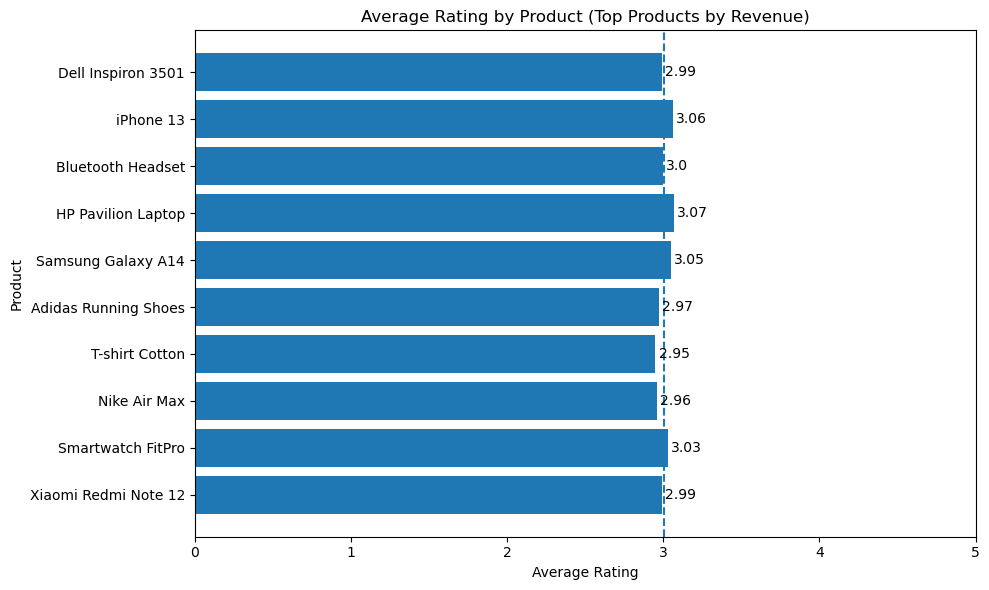

In [85]:
plt.figure(figsize=(10, 6))

plt.barh(
    top_products['product'],
    top_products['avg_rating']
)

plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.title('Average Rating by Product (Top Products by Revenue)')

# benchmark (наприклад, 4.0)
plt.axvline(
    top_products['avg_rating'].mean(),
    linestyle='--'
)

for index, value in enumerate(top_products['avg_rating']):
    plt.text(
        value + 0.02,
        index,
        f"{value}",
        va='center'
    )

plt.xlim(0, 5)
plt.tight_layout()

plt.savefig(
    "Average rating Product.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


In [86]:
city_performance = (
    df.groupby('city')
      .agg(
          revenue=('totalamount', 'sum'),
          orders=('orderid', 'nunique')
      )
      .reset_index()
)

city_performance['aov'] = (
    city_performance['revenue'] / city_performance['orders']
)

# Фільтр: мінімум 50 замовлень (можеш змінити)
city_performance = city_performance[city_performance['orders'] >= 50]

city_performance = (
    city_performance
    .round({'aov': 2})
    .sort_values('aov', ascending=False)
)


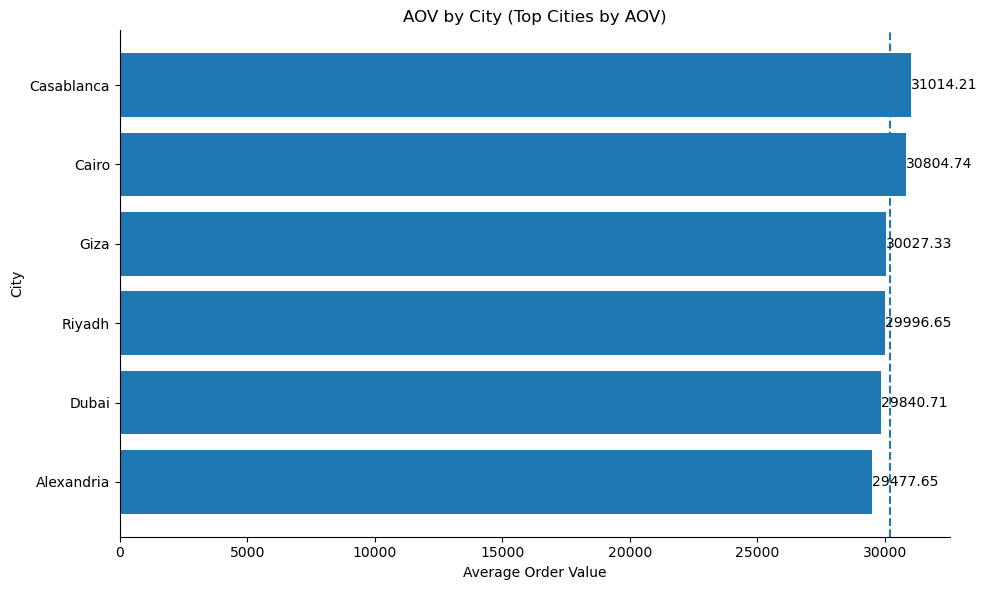

In [90]:
import matplotlib.pyplot as plt

top_cities = city_performance.head(15)

plt.figure(figsize=(10, 6))

plt.barh(
    top_cities['city'],
    top_cities['aov']
)

plt.xlabel('Average Order Value')
plt.ylabel('City')
plt.title('AOV by City (Top Cities by AOV)')

# Benchmark — середній AOV
plt.axvline(
    city_performance['aov'].mean(),
    linestyle='--'
)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Значення AOV на кожному барі
for index, value in enumerate(top_cities['aov']):
    plt.text(
        value,
        index,
        f"{value}",
        va='center',
        ha='left'
    )

plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig(
    "AOV City.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)
plt.show()
